<a href="https://colab.research.google.com/github/BarryLiu-97/Tensorflow-Tutorial/blob/master/basic/tf_exp_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow实现梯度下降

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Tensorflow实现一元线性回归

i:0, Loss:0.310537, w:1.764006, b:0.400084
i:10, Loss:0.309778, w:1.763540, b:0.399347
i:20, Loss:0.309021, w:1.763075, b:0.398612
i:30, Loss:0.308265, w:1.762610, b:0.397878
i:40, Loss:0.307512, w:1.762146, b:0.397145
i:50, Loss:0.306761, w:1.761682, b:0.396412
i:60, Loss:0.306011, w:1.761219, b:0.395681
i:70, Loss:0.305263, w:1.760756, b:0.394950
i:80, Loss:0.304518, w:1.760294, b:0.394221
i:90, Loss:0.303774, w:1.759833, b:0.393493


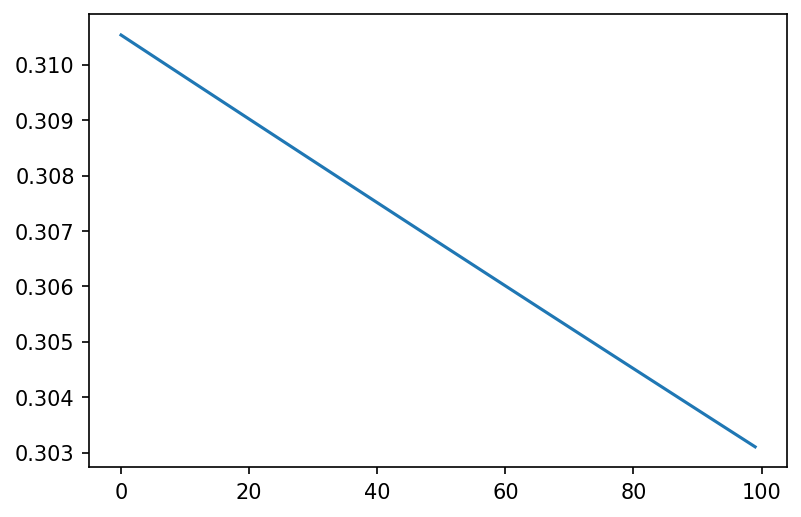

In [15]:
X_raw = np.array([2013, 2014, 2015, 2016, 2017], dtype=np.float32)
y_raw = np.array([12000, 14000, 15000, 16500, 17500], dtype=np.float32)

#标准化数据/归一化数据
X = (X_raw - X_raw.min()) / (X_raw.max() - X_raw.min())
y = (y_raw - y_raw.min()) / (y_raw.max() - y_raw.min())

X = tf.constant(X)
y = tf.constant(y)

np.random.seed(0)
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

learn_rate = 0.0001
num_epoch = 100
display_step = 10
mse=[]
for i in range(num_epoch):
    # 使用tf.GradientTape()记录损失函数的梯度信息
    with tf.GradientTape() as tape:
        y_pred = w * X + b
        Loss = 0.5*tf.reduce_mean(tf.square(y_pred - y))
    mse.append(Loss)
    # TensorFlow自动计算损失函数关于自变量（模型参数）的梯度 
    dL_dw, dL_db = tape.gradient(Loss, [w,b])

    w.assign_sub(learn_rate*dL_dw)  #给variable赋值要使用assign_sub
    b.assign_sub(learn_rate*dL_db)

    if i % display_step == 0:
      print("i:%i, Loss:%f, w:%f, b:%f" % (i,Loss,w.numpy(),b.numpy()))
plt.figure(dpi=150)
plt.plot(mse)
plt.show()

## Numpy实现多元线性回归



i:0, Loss:114334954.369376,
i:10, Loss:4938430.592831,
i:20, Loss:1168535.670417,
i:30, Loss:783271.178414,
i:40, Loss:575952.345590,
i:50, Loss:427141.867722,


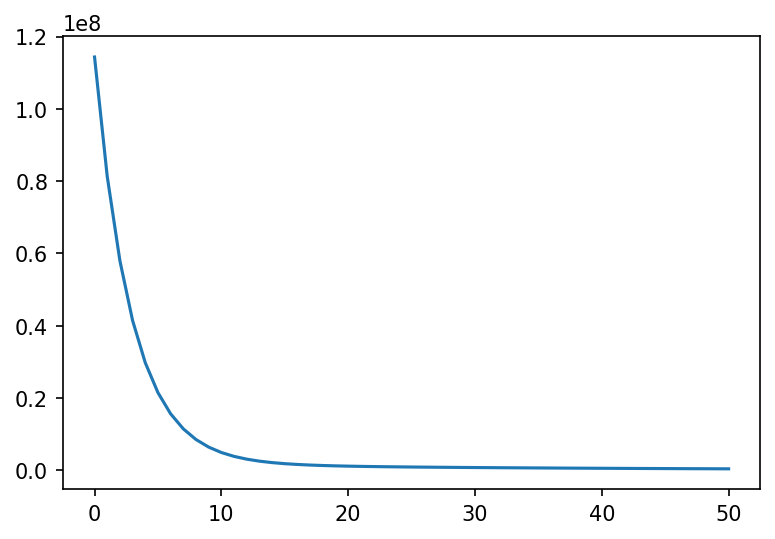

In [23]:
X1_raw = np.array([2013, 2014, 2015, 2016, 2017], dtype=np.float32)
X2_raw = np.array([1, 2, 3, 4, 5], dtype=np.float32)
y_raw = np.array([12000, 14000, 15000, 16500, 17500], dtype=np.float32)
num = len(X1_raw)
#标准化数据/归一化数据
X0 = np.ones(num) 
X1 = (X1_raw - X1_raw.min()) / (X1_raw.max() - X1_raw.min())
X2 = (X2_raw - X2_raw.min()) / (X2_raw.max() - X2_raw.min())

X = np.stack((X0,X1,X2), axis=1)
Y = y_raw.reshape(-1,1)

learn_rate = 0.1
epoch = 50

display_step = 10

np.random.seed(1)
W = np.random.randn(3,1)

mse=[]
for i in range(epoch+1):
    # 使用tf.GradientTape()记录损失函数的梯度信息
    with tf.GradientTape() as tape:
        Y_PRED = np.matmul(X,W)
        Loss = 0.5*np.mean(np.square(Y_PRED - Y))
    mse.append(Loss)
    #dL_dW = np.matmul(np.transpose(X), np.matmul(X,W)-Y)
    #因为Loss是均方误差，除以了样本总数，所以偏导数里也需要除以样本总数
    dL_dW = np.matmul(np.transpose(X), np.matmul(X,W)-Y)/num
    #注意此处的偏导数是手算的
    W = W - learn_rate * dL_dW

    if i % display_step == 0:
      print("i:%i, Loss:%f," % (i,mse[i]))
plt.figure(dpi=150)
plt.plot(mse)
plt.show()

## Tensorflow实现多元线性回归

i:0, Loss:114334954.369376,
i:10, Loss:4938430.592831,
i:20, Loss:1168535.670417,
i:30, Loss:783271.178414,
i:40, Loss:575952.345590,
i:50, Loss:427141.867722,


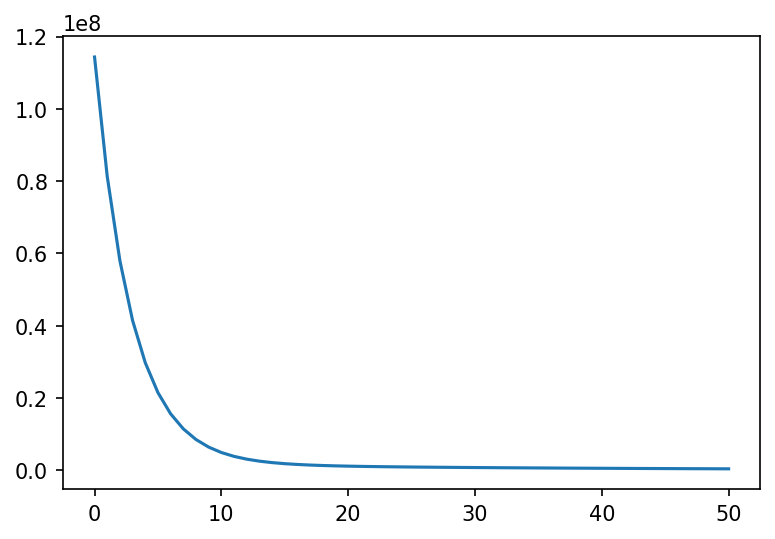

In [25]:
X1_raw = np.array([2013, 2014, 2015, 2016, 2017], dtype=np.float32)
X2_raw = np.array([1, 2, 3, 4, 5], dtype=np.float32)
y_raw = np.array([12000, 14000, 15000, 16500, 17500], dtype=np.float32)
num = len(X1_raw)
#标准化数据/归一化数据
X0 = np.ones(num) 
X1 = (X1_raw - X1_raw.min()) / (X1_raw.max() - X1_raw.min())
X2 = (X2_raw - X2_raw.min()) / (X2_raw.max() - X2_raw.min())

X = np.stack((X0,X1,X2), axis=1)
Y = y_raw.reshape(-1,1)

learn_rate = 0.1
epoch = 50

display_step = 10

np.random.seed(1)
W = tf.Variable(np.random.randn(3,1))  #注意此时因为继承float64的numpy，所以此处数据为float64而不是float32

mse=[]
for i in range(epoch+1):
    # 使用tf.GradientTape()记录损失函数的梯度信息
    with tf.GradientTape() as tape:
        Y_PRED = tf.matmul(X,W)
        Loss = 0.5*tf.reduce_mean(tf.square(Y_PRED - Y))
    mse.append(Loss)
    #dL_dW = np.matmul(np.transpose(X), np.matmul(X,W)-Y)
    #因为Loss是均方误差，除以了样本总数，所以偏导数里也需要除以样本总数
    dL_dW = tape.gradient(Loss,W)
    W.assign_sub(learn_rate*dL_dW)

    if i % display_step == 0:
      print("i:%i, Loss:%f," % (i,mse[i]))
plt.figure(dpi=150)
plt.plot(mse)
plt.show()

可见使用Numpy与Tensorfow结果差不多，但是Tensorflow可以自动求导，更为简洁。